# Data Visualization and Correlation

# Impor packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
import os
os.getcwd()

'C:\\Users\\LENOVO\\Python\\Beginner'

# Impor data dari CSV ke DataFrame

In [3]:
df = pd.read_csv('C:/Users/LENOVO/Python/Online Retail Data.csv', header=0)
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


# Data cleansing

In [4]:
df_clean = df.copy()

Membuat kolom date

In [5]:
df_clean['date'] = pd.to_datetime(df_clean['order_date']).dt.date

menghapus semua baris tanpa product_name

In [6]:
df_clean = df_clean[~df_clean['product_name'].isna()]

membuat semua product_name berhuruf kecil

In [7]:
df_clean['product_name'] = df_clean['product_name'].str.lower()

menghapus semua baris dengan product_code atau product_name test

In [8]:
df_clean = df_clean[(~df_clean['product_code'].str.lower().str.contains('test')) |
                    (~df_clean['product_name'].str.contains('test '))]

membuat kolom order_status dengan nilai 'cancelled' jika order_id diawali dengan huruf 'c' dan 'delivered' jika order_id tanpa awalan huruf 'c'

In [9]:
df_clean['order_status'] = np.where(df_clean['order_id'].str[:1]=='C', 'cancelled', 'delivered')

mengubah nilai quantity yang negatif menjadi positif karena nilai negatif tersebut hanya menandakan order tersebut cancelled

In [10]:
df_clean['quantity'] = df_clean['quantity'].abs()

menghapus baris dengan price bernilai negatif

In [11]:
df_clean = df_clean[df_clean['price']>0]

membuat nilai amount, yaitu perkalian antara quantity dan price

In [12]:
df_clean['amount'] = df_clean['quantity'] * df_clean['price']

mengganti product_name dari product_code yang memiliki beberapa product_name dengan salah satu product_name-nya yang paling sering muncul

In [13]:
most_freq_product_name = df_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])

In [14]:
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df_clean['product_name'] = df_clean['most_freq_product_name']
df_clean = df_clean.drop(columns='most_freq_product_name')

mengkonversi customer_id menjadi string

In [15]:
df_clean['customer_id'] = df_clean['customer_id'].astype(str)

menghapus outlier di kolom quantity dan amount, berdasarkan Z-score

In [16]:
from scipy import stats
df_clean = df_clean[(np.abs(stats.zscore(df_clean[['quantity','amount']]))<3).all(axis=1)]
df_clean = df_clean.reset_index(drop=True)
df_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,order_status,amount
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590.0,2010-01-04,cancelled,4.25
1,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,nan,2010-01-04,delivered,0.85
2,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,nan,2010-01-04,delivered,3.75
3,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,nan,2010-01-04,delivered,0.85
4,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01-04,delivered,91.80
...,...,...,...,...,...,...,...,...,...,...
455491,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,nan,2010-12-23,delivered,1.25
455492,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,nan,2010-12-23,delivered,5.80
455493,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,nan,2010-12-23,delivered,3.75
455494,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,nan,2010-12-23,delivered,1.25


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455496 entries, 0 to 455495
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      455496 non-null  object 
 1   product_code  455496 non-null  object 
 2   product_name  455496 non-null  object 
 3   quantity      455496 non-null  int64  
 4   order_date    455496 non-null  object 
 5   price         455496 non-null  float64
 6   customer_id   455496 non-null  object 
 7   date          455496 non-null  object 
 8   order_status  455496 non-null  object 
 9   amount        455496 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 34.8+ MB


# Data visualization

## Tabel pivot (pivot table)

In [18]:
pd.pivot_table(df_clean, index='date',
               columns='order_status', values=['order_id','amount'],
               aggfunc={'order_id': pd.Series.nunique,
                        'amount': np.sum},
               fill_value=0
)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9784\965251063.py:1: FutureWarning: The provided callable <function sum at 0x0000022F7BD8E5C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_clean, index='date',


amount            order_id          
order_status cancelled delivered cancelled delivered
date                                                
2010-01-04      250.36   7866.41        11        26
2010-01-05       96.95  15529.29         4        33
2010-01-06        0.00   7430.34         0        13
2010-01-07      649.87  17506.10        32        40
2010-01-08       21.90  13404.25         1        36
...                ...       ...       ...       ...
2010-12-19       17.60   6653.94         2        21
2010-12-20      986.42  21149.55        24        54
2010-12-21      206.15  24229.66        10        47
2010-12-22       65.40   3690.45         5        13
2010-12-23      207.85   9767.24         8        24

[298 rows x 4 columns]

In [19]:
pd.pivot_table(
    df_clean,
    index='date',
    columns='order_status',
    values=['order_id', 'amount'],
    aggfunc={
        'order_id': pd.Series.nunique,
        'amount': 'sum'
    },
    fill_value=0
)

amount            order_id          
order_status cancelled delivered cancelled delivered
date                                                
2010-01-04      250.36   7866.41        11        26
2010-01-05       96.95  15529.29         4        33
2010-01-06        0.00   7430.34         0        13
2010-01-07      649.87  17506.10        32        40
2010-01-08       21.90  13404.25         1        36
...                ...       ...       ...       ...
2010-12-19       17.60   6653.94         2        21
2010-12-20      986.42  21149.55        24        54
2010-12-21      206.15  24229.66        10        47
2010-12-22       65.40   3690.45         5        13
2010-12-23      207.85   9767.24         8        24

[298 rows x 4 columns]

## Grafik batang (bar chart)

In [20]:
df_status_summary = df_clean.groupby('order_status', as_index=False).agg(order_cnt=('order_id','nunique'),total_amount=('amount','sum'))
df_status_summary

,order_status,order_cnt,total_amount
0,cancelled,3746,158184.030
1,delivered,17925,6932842.013


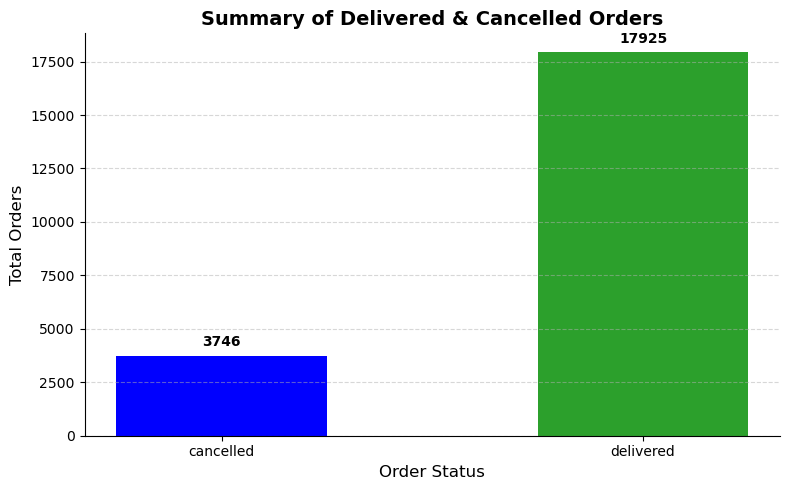

In [21]:
import matplotlib.pyplot as plt

# Warna khusus per status jika tersedia
colors = {
    'delivered': '#2ca02c',  # hijau
    'canceled': '#d62728',   # merah
}

# Ambil warna sesuai status, default biru
bar_colors = [colors.get(status, 'blue') for status in df_status_summary['order_status']]

# Membuat figure dan axes
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(
    df_status_summary['order_status'],
    df_status_summary['order_cnt'],
    color=bar_colors,
    width=0.5
)

# Menambahkan label di atas setiap bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

# Label dan judul
ax.set_xlabel('Order Status', fontsize=12)
ax.set_ylabel('Total Orders', fontsize=12)
ax.set_title('Summary of Delivered & Cancelled Orders', fontsize=14, fontweight='bold')

# Tampilan grid horizontal
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Hilangkan bingkai atas dan kanan agar lebih bersih
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

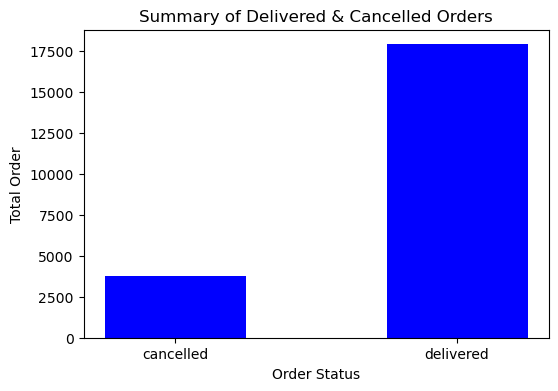

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
plt.bar(df_status_summary['order_status'], df_status_summary['order_cnt'],
        color='blue', width=0.5)
plt.xlabel('Order Status')
plt.ylabel('Total Order')
plt.title('Summary of Delivered & Cancelled Orders')
plt.show()

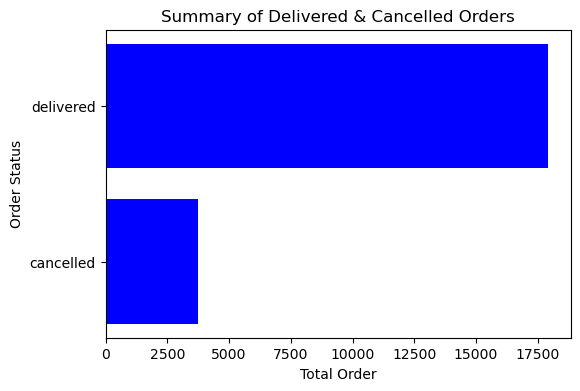

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
plt.barh(df_status_summary['order_status'], df_status_summary['order_cnt'],
         color='blue')
plt.xlabel('Total Order')
plt.ylabel('Order Status')
plt.title('Summary of Delivered & Cancelled Orders')
plt.show()

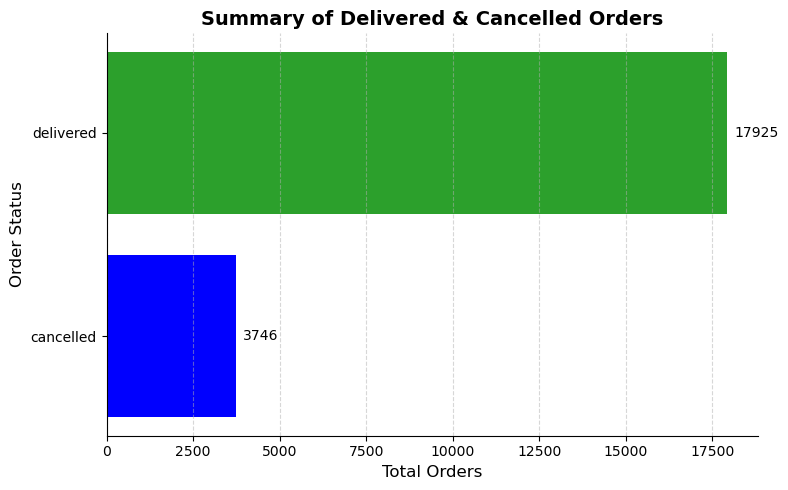

In [24]:
import matplotlib.pyplot as plt

# Warna per status jika tersedia
colors = {
    'delivered': '#2ca02c',
    'canceled': '#d62728',
}
bar_colors = [colors.get(status, 'blue') for status in df_status_summary['order_status']]

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.barh(df_status_summary['order_status'],
               df_status_summary['order_cnt'],
               color=bar_colors)

# Menambahkan label di samping bar
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{int(width)}',
                xy=(width, bar.get_y() + bar.get_height()/2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center',
                fontsize=10)

# Label dan tampilan
ax.set_xlabel('Total Orders', fontsize=12)
ax.set_ylabel('Order Status', fontsize=12)
ax.set_title('Summary of Delivered & Cancelled Orders', fontsize=14, fontweight='bold')
ax.xaxis.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


## Histogram

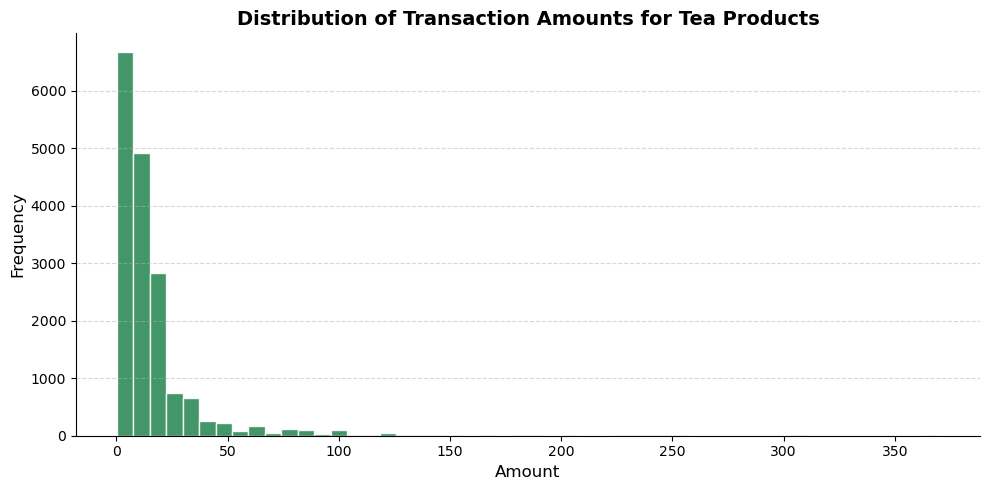

In [25]:
import matplotlib.pyplot as plt

tea_amounts = df_clean.loc[df_clean['product_name'].str.contains('tea', case=False), 'amount']

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(tea_amounts, bins=50, color='seagreen', edgecolor='white', alpha=0.9)

# Label dan tampilan
ax.set_title('Distribution of Transaction Amounts for Tea Products', fontsize=14, fontweight='bold')
ax.set_xlabel('Amount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

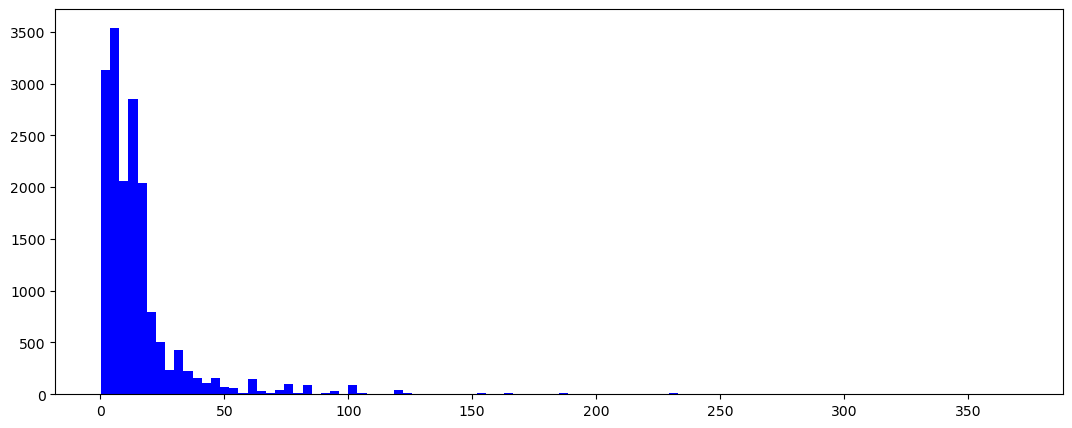

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 5))
plt.hist(df_clean.loc[df_clean['product_name'].str.contains('tea'), 'amount'], 100,
         color='blue')
plt.show()

## Grafik garis (line chart)

In [27]:
df_date_summary = df_clean.groupby('date', as_index=False).agg(order_cnt=('order_id','nunique'))
df_date_summary

,date,order_cnt
0,2010-01-04,37
1,2010-01-05,37
2,2010-01-06,13
3,2010-01-07,72
4,2010-01-08,37
...,...,...
293,2010-12-19,23
294,2010-12-20,78
295,2010-12-21,57
296,2010-12-22,18


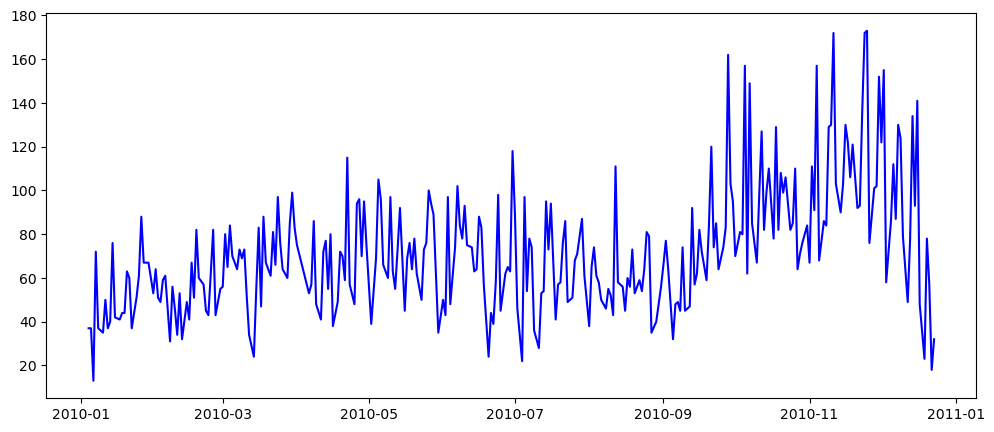

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))
plt.plot('date', 'order_cnt', data=df_date_summary, color='blue', linestyle='-')
plt.show()

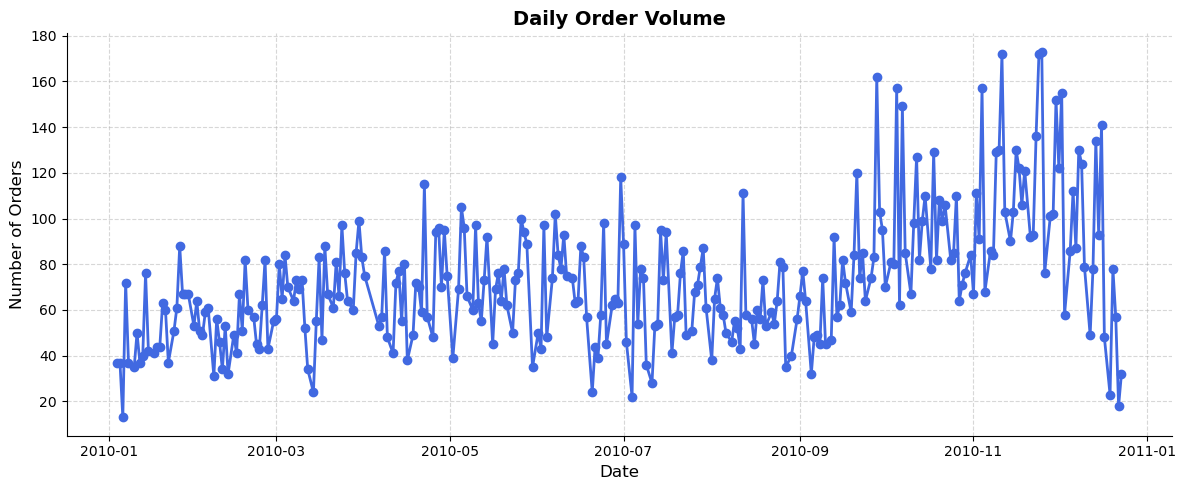

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(df_date_summary['date'], df_date_summary['order_cnt'],
        color='royalblue', linestyle='-', marker='o', linewidth=2)

# Format tanggal jika kolom 'date' berupa datetime
if pd.api.types.is_datetime64_any_dtype(df_date_summary['date']):
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    fig.autofmt_xdate()

# Label dan tampilan
ax.set_title('Daily Order Volume', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Grafik lingkaran (pie chart)

In [30]:
df_status_summary

,order_status,order_cnt,total_amount
0,cancelled,3746,158184.030
1,delivered,17925,6932842.013


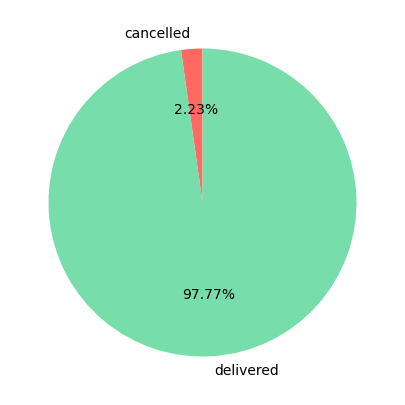

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 5))
plt.pie(df_status_summary['total_amount'], labels=df_status_summary['order_status'],
        startangle=90, autopct='%1.2f%%', colors=['#FF6961','#77DDAA'])
plt.show()

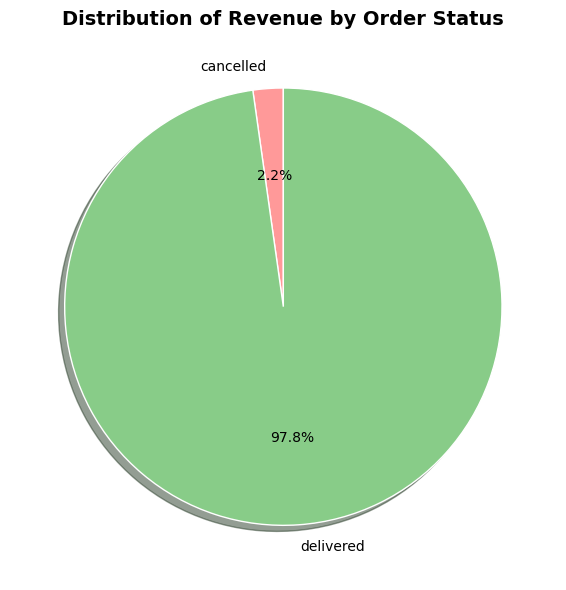

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.pie(df_status_summary['total_amount'],
       labels=df_status_summary['order_status'],
       startangle=90,
       autopct=lambda pct: f"{pct:.1f}%",
       colors=['#FF9999', '#88CC88'],
       shadow=True,
       wedgeprops={'edgecolor': 'white', 'linewidth': 1})

ax.set_title('Distribution of Revenue by Order Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Grafik sebar (scatterplot)

In [33]:
df_tea_only = df_clean[df_clean['product_name'].str.contains('tea')]
df_tea_only

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,order_status,amount
8,493414,21527,red retrospot traditional teapot,12,2010-01-04 10:28:00,6.95,14590.0,2010-01-04,delivered,83.40
10,C493415,21527,red retrospot traditional teapot,3,2010-01-04 10:33:00,7.95,14590.0,2010-01-04,cancelled,23.85
20,493427,79000,moroccan tea glass,12,2010-01-04 10:43:00,0.85,13287.0,2010-01-04,delivered,10.20
56,C493430,21527,red retrospot traditional teapot,1,2010-01-04 11:43:00,7.95,14680.0,2010-01-04,cancelled,7.95
100,493432,22072,red retrospot tea cup and saucer,2,2010-01-04 12:30:00,3.75,14680.0,2010-01-04,delivered,7.50
...,...,...,...,...,...,...,...,...,...,...
455138,539958,22481,black tea towel classic design,3,2010-12-23 13:26:00,0.85,nan,2010-12-23,delivered,2.55
455196,539958,22900,set 2 tea towels i love london,1,2010-12-23 13:26:00,5.91,nan,2010-12-23,delivered,5.91
455467,539988,47559B,tea time oven glove,2,2010-12-23 16:06:00,1.25,18116.0,2010-12-23,delivered,2.50
455485,539991,22891,tea for one polkadot,1,2010-12-23 16:49:00,4.25,nan,2010-12-23,delivered,4.25


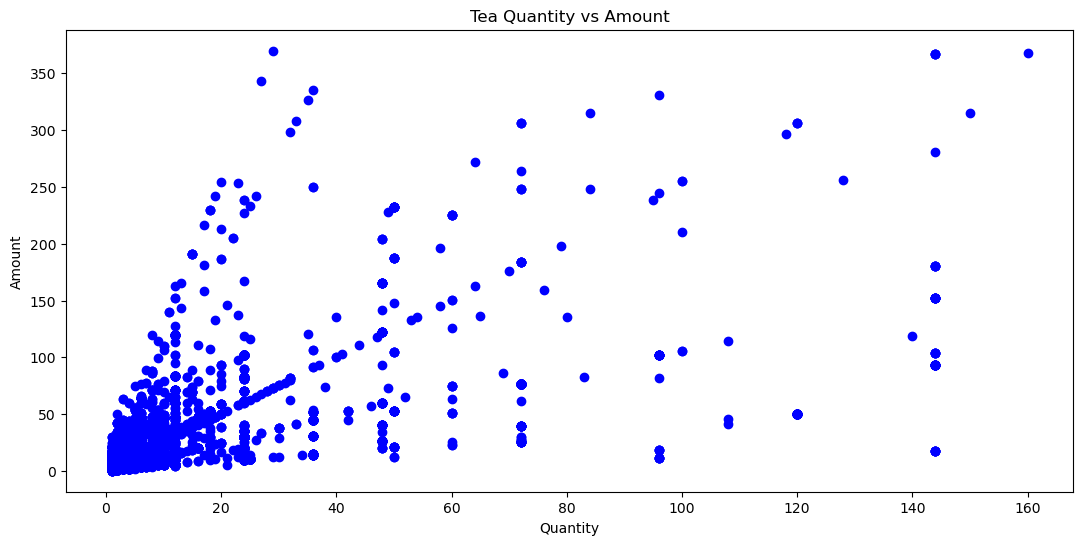

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13, 6))
plt.scatter(df_tea_only['quantity'], df_tea_only['amount'], c='blue', marker='o')
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.title('Tea Quantity vs Amount')
plt.show()

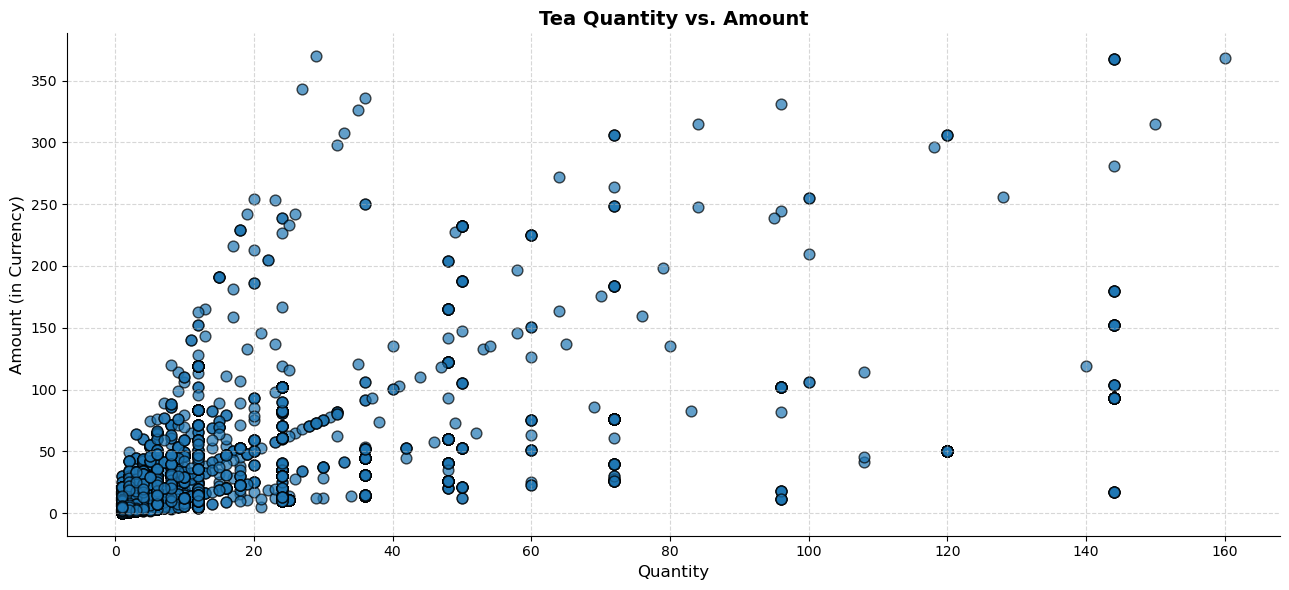

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13, 6))
ax.scatter(df_tea_only['quantity'], df_tea_only['amount'],
           color='#1f77b4', alpha=0.7, edgecolors='k', s=60)

ax.set_title('Tea Quantity vs. Amount', fontsize=14, fontweight='bold')
ax.set_xlabel('Quantity', fontsize=12)
ax.set_ylabel('Amount (in Currency)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

## Grafik kotak-garis (boxplot)

In [36]:
import numpy as np
print(np.quantile(df_tea_only['quantity'],.50))
print(np.percentile(df_tea_only['quantity'],75))

3.0
8.0


<Axes: ylabel='quantity'>

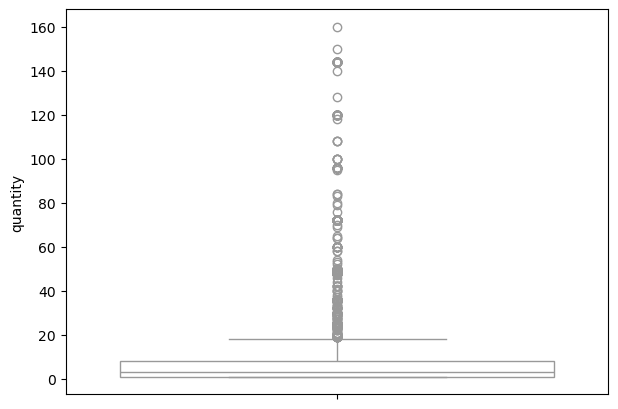

In [37]:
import seaborn as sns
fig = plt.figure(figsize=(7, 5))
sns.boxplot(data=df_tea_only, y='quantity', color='white')

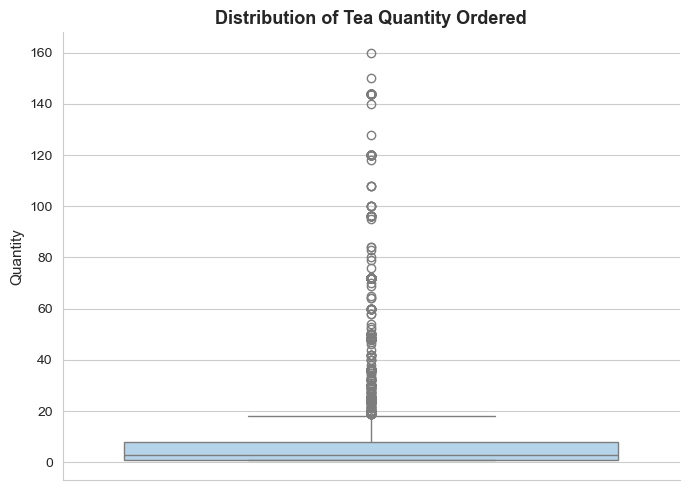

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(7, 5))
sns.boxplot(data=df_tea_only, y='quantity', color='#AED6F1', ax=ax)

ax.set_title('Distribution of Tea Quantity Ordered', fontsize=13, fontweight='bold')
ax.set_ylabel('Quantity', fontsize=11)
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

<Axes: ylabel='amount'>

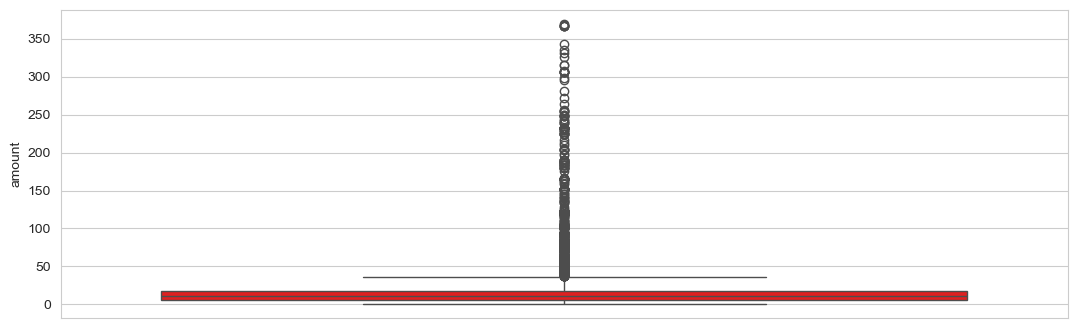

In [39]:
import seaborn as sns
fig = plt.figure(figsize=(13, 4))
sns.boxplot(data=df_tea_only, y='amount', color='red')

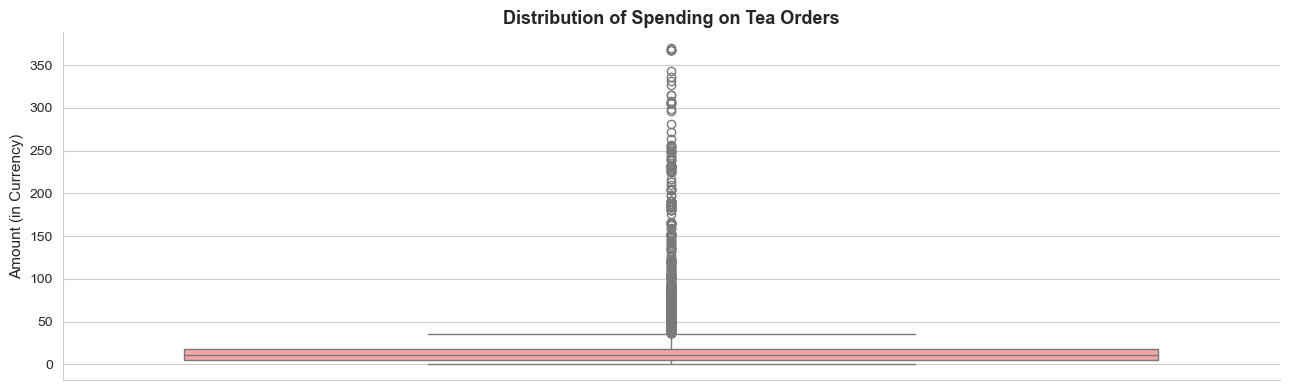

In [40]:
fig, ax = plt.subplots(figsize=(13, 4))
sns.boxplot(data=df_tea_only, y='amount', color='#FF9999', ax=ax)

ax.set_title('Distribution of Spending on Tea Orders', fontsize=13, fontweight='bold')
ax.set_ylabel('Amount (in Currency)', fontsize=11)
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

## Heatmap - Correlation

<Axes: >

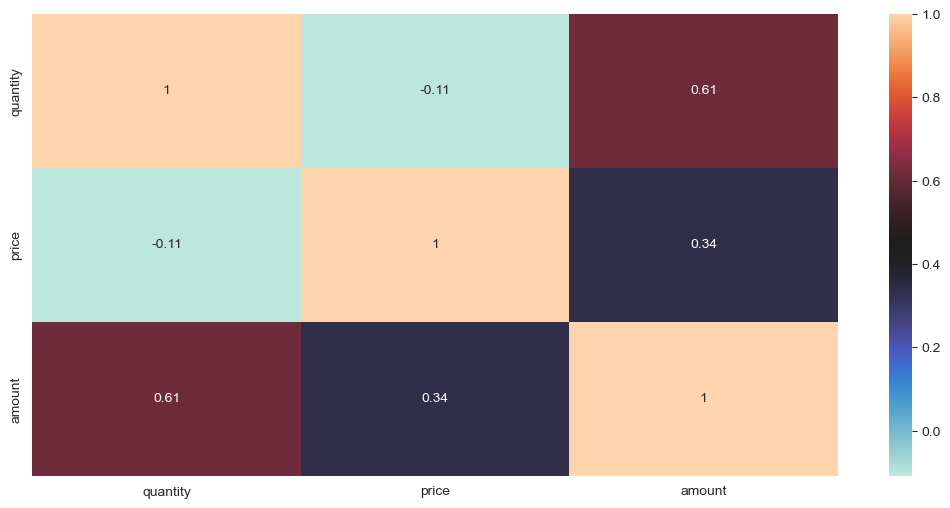

In [41]:
import seaborn as sns

df_clean_new = df_clean[['quantity','price','amount']]
fig = plt.figure(figsize=(13, 6))
sns.heatmap(df_clean_new.corr(), cmap='icefire', annot=True)

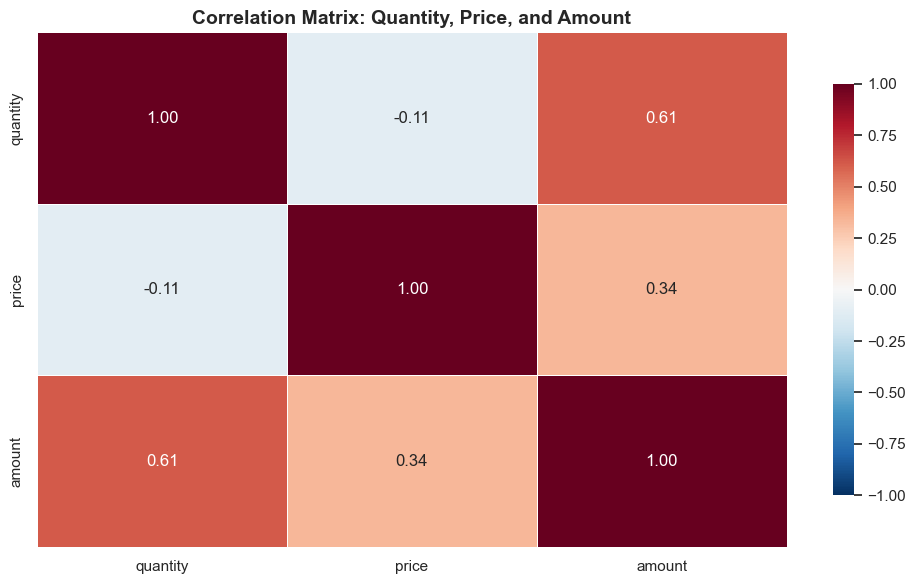

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hanya ambil kolom relevan
df_clean_new = df_clean[['quantity', 'price', 'amount']]

# Set style
sns.set_theme(style="white")

# Buat figure
plt.figure(figsize=(10, 6))

# Heatmap korelasi
corr = df_clean_new.corr()
sns.heatmap(corr, 
            cmap='RdBu_r',  # Bisa diganti ke 'coolwarm' atau 'vlag'
            annot=True, 
            fmt=".2f", 
            linewidths=0.5,
            vmin=-1, vmax=1,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix: Quantity, Price, and Amount', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

| Variabel                       | Interpretasi Korelasi                                                                                                                                                                                                                                          |
| ------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Quantity & Amount (`0.61`) | Korelasi positif cukup kuat. Artinya, semakin banyak jumlah barang (`quantity`), semakin besar pula total `amount` yang dibayar. Ini masuk akal karena `amount = quantity x price`.                                                                    |
| Price & Amount (`0.34`)    | Korelasi positif lemah–sedang. Harga yang lebih tinggi sedikit berkontribusi terhadap naiknya `amount`. Korelasi ini tidak sebesar `quantity`, kemungkinan karena sebagian besar variasi `amount` disebabkan oleh perubahan `quantity`, bukan `price`. |
| Quantity & Price (`-0.11`) | Korelasi negatif sangat lemah. Artinya, tidak ada hubungan signifikan antara banyaknya barang yang dibeli dengan harganya. Ini menunjukkan pembeli tidak membatasi pembelian berdasarkan harga per unit.                                               |
